# 📊 Notebook 3: Exploratory Data Analysis (EDA)

## 📆 Temporal Trends
- Line plots showing how average player ratings evolved over years.
- Noticed a rise in technical skill attributes post FIFA 17.

## 🔄 Correlation Analysis
- Heatmaps to observe multicollinearity between features.
- Strong correlation seen between Overall and Potential, and also between Shooting & Finishing.

## 🏛️ Distribution Plots
- Histogram of Age, Value, and Wage
- Violin plots showing distribution by Position

## 👥 Player Position Analysis
- Boxplots comparing Overall stats across different positions (Defender, Midfielder, Forward)

## ⚡ Key Insight
- Midfielders show higher balance across attributes
- Goalkeepers have extremely skewed distributions due to role-specific stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Football Dimensionality Reduction Project/data/processed_fifa.csv')

# Set plotting style
sns.set(style='whitegrid')


Mounted at /content/drive


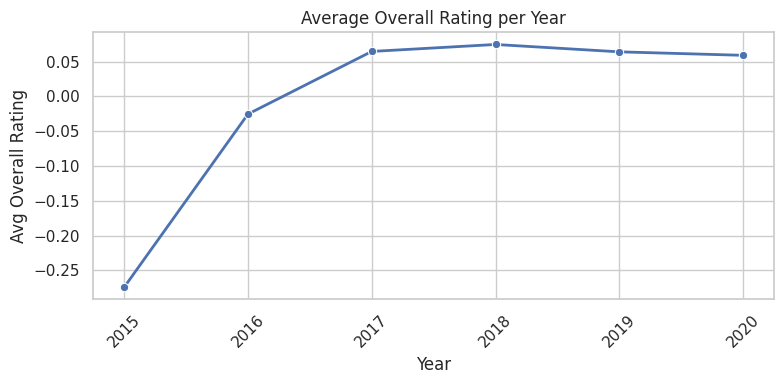

In [ ]:
# Average overall score over the years
overall_by_year = df.groupby('year')['overall'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=overall_by_year, x='year', y='overall', marker='o', linewidth=2)
plt.title('Average Overall Rating per Year')
plt.xlabel('Year')
plt.ylabel('Avg Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


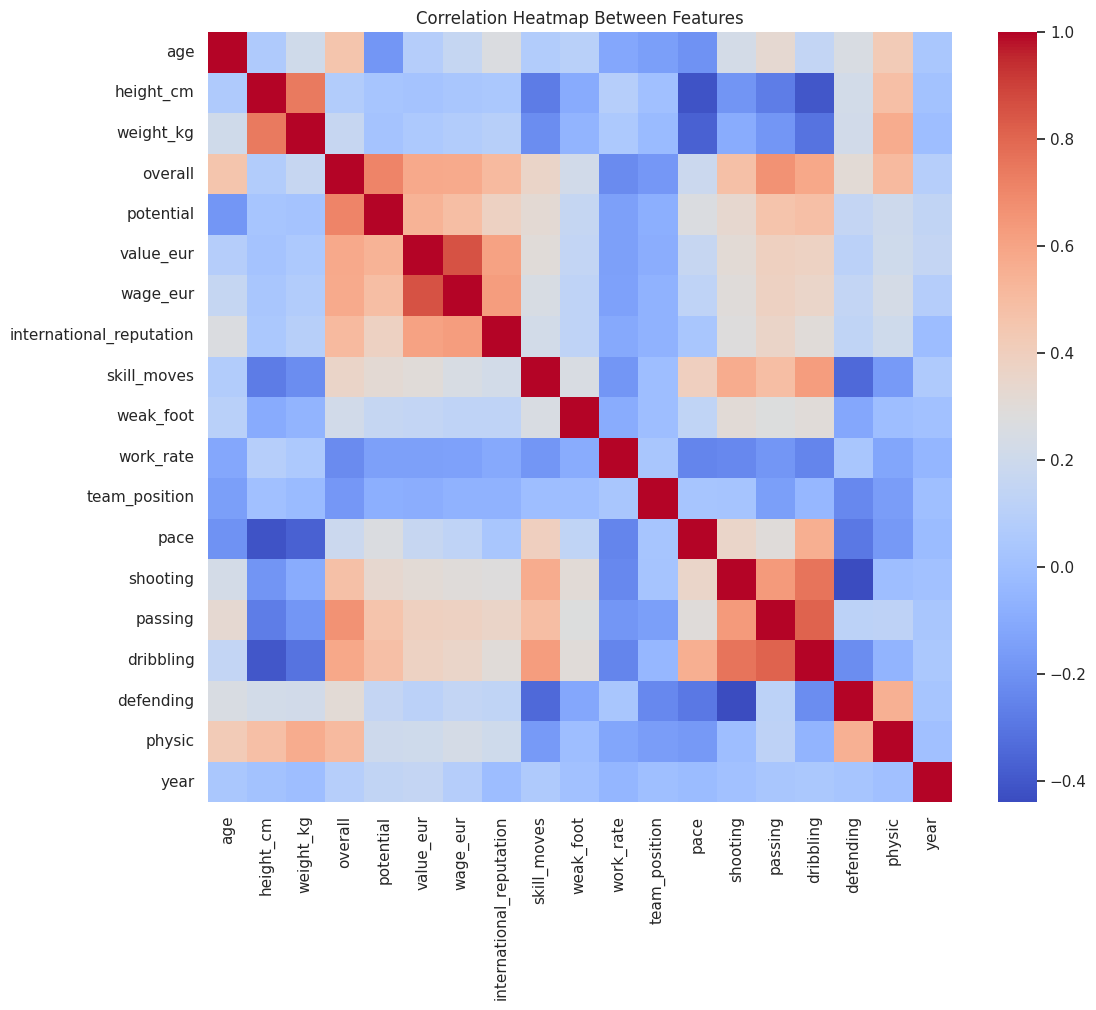

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns=['short_name']).corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap Between Features')
plt.show()


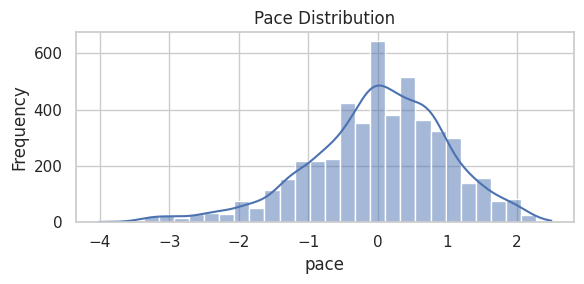

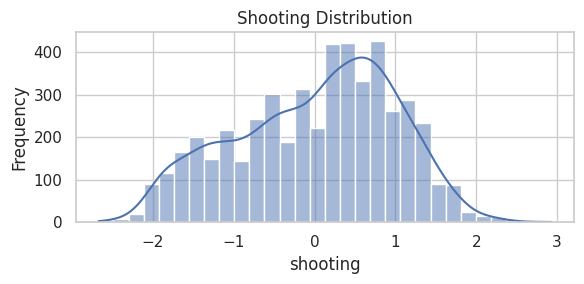

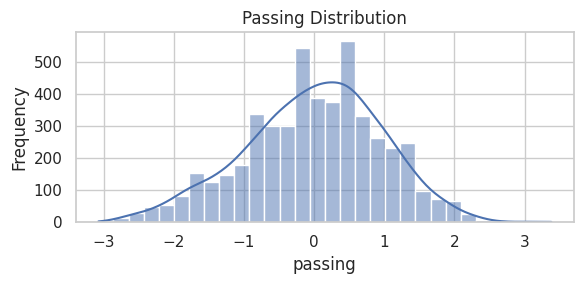

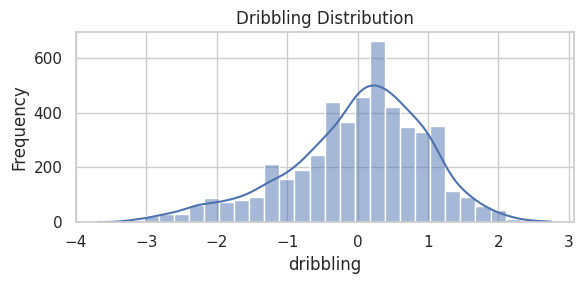

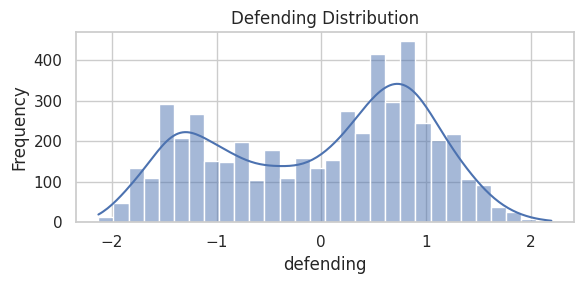

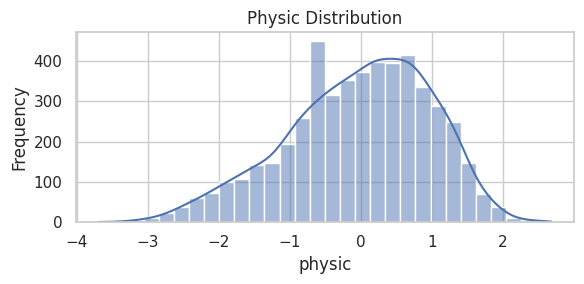

In [ ]:
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df_sample = df.sample(5000)  # plot only a sample for clarity

for skill in skills:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_sample[skill], bins=30, kde=True)
    plt.title(f'{skill.capitalize()} Distribution')
    plt.xlabel(skill)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [ ]:
top_players = df.sort_values(by='overall', ascending=False).head(10)
print(top_players[['short_name', 'overall', 'year']])


              short_name   overall  year
56994  Cristiano Ronaldo  3.996517  2019
41577  Cristiano Ronaldo  3.996517  2018
56995           L. Messi  3.996517  2019
26687  Cristiano Ronaldo  3.996517  2017
13566           L. Messi  3.996517  2016
72587           L. Messi  3.996517  2020
72588  Cristiano Ronaldo  3.853902  2020
0               L. Messi  3.853902  2015
26688           L. Messi  3.853902  2017
13567  Cristiano Ronaldo  3.853902  2016


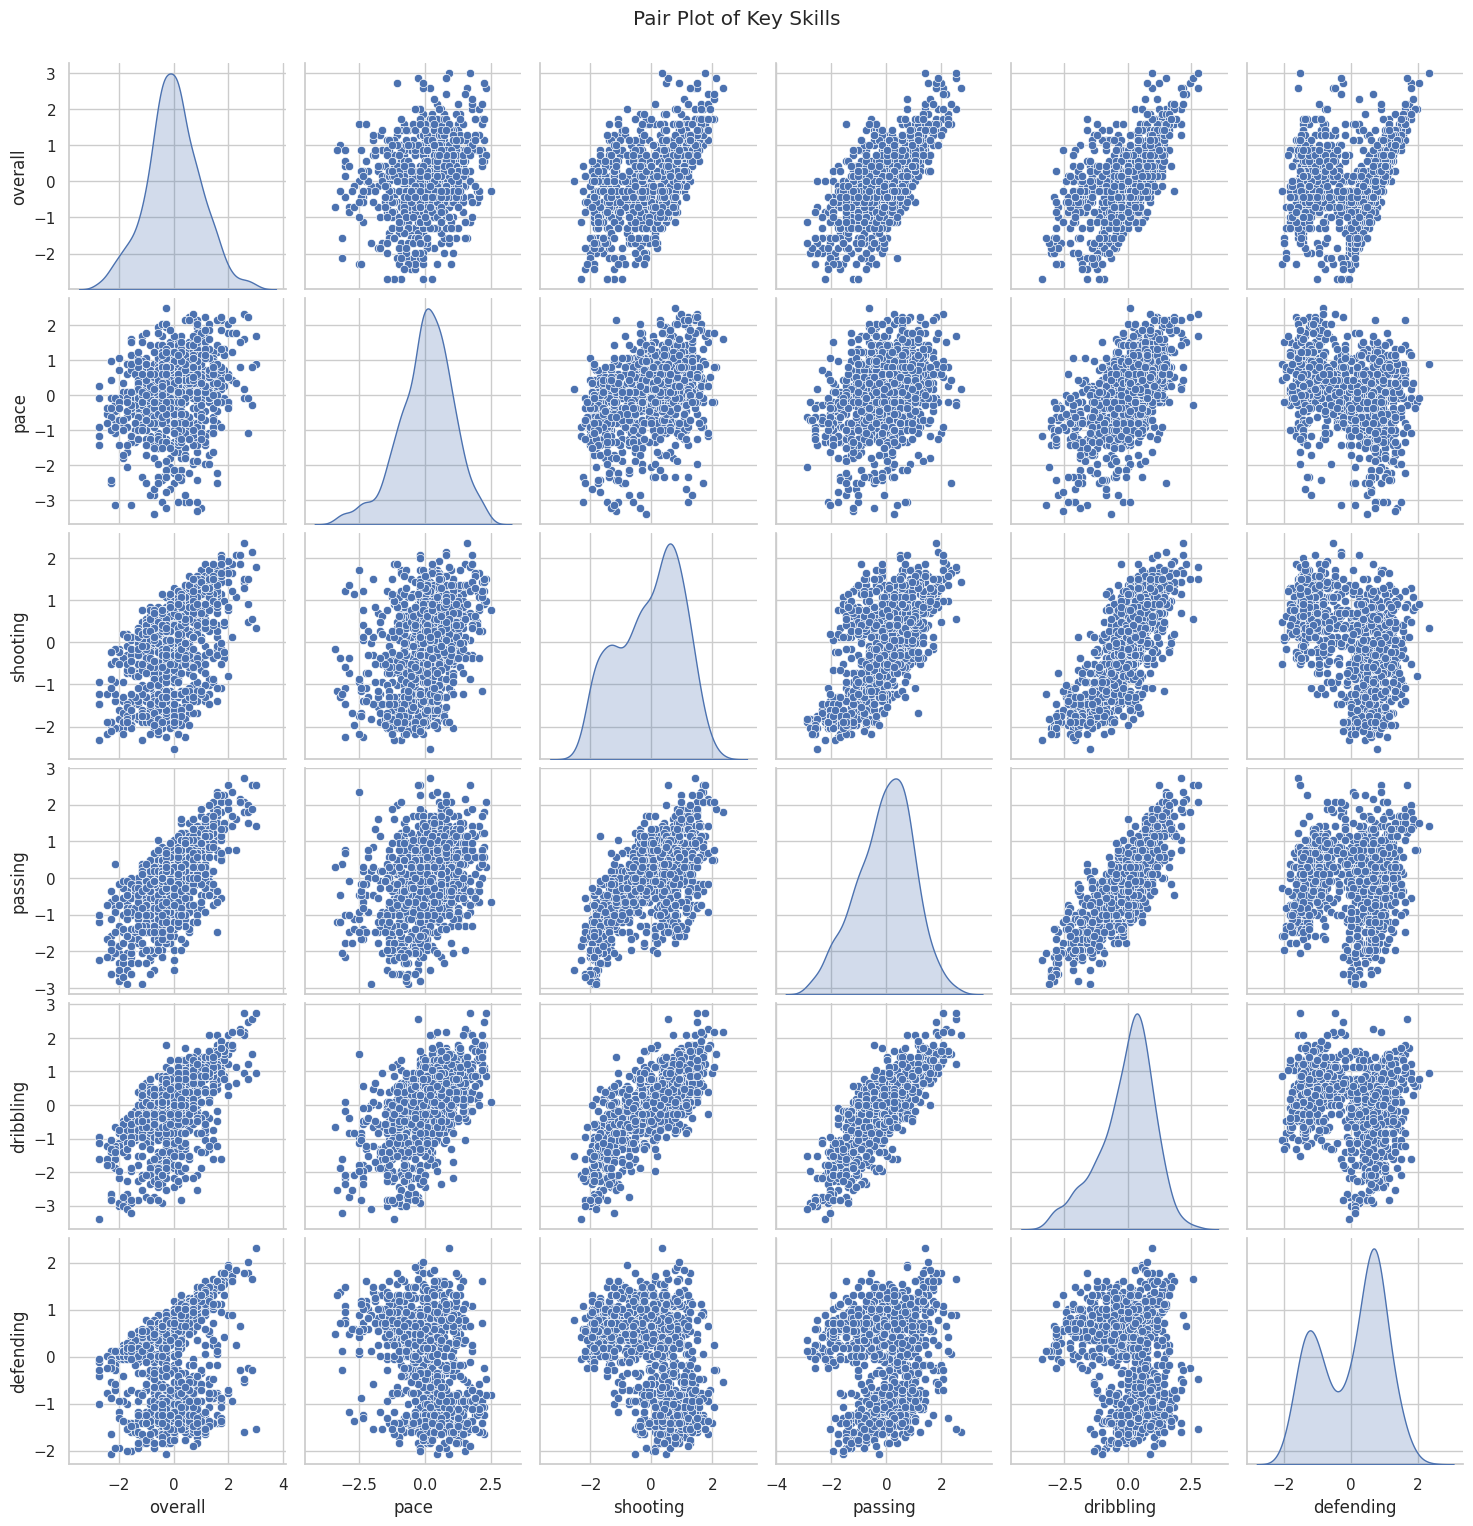

In [ ]:
sample = df.sample(1000)
sns.pairplot(sample[['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending']], diag_kind='kde')
plt.suptitle("Pair Plot of Key Skills", y=1.02)
plt.show()
